<a href="https://colab.research.google.com/github/jimhannaway/Introductory-Machine-Learning-in-Python/blob/master/Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression
[Source: Machine Learning Algorithms for Beginners with Python Code Examples](https://medium.com/towards-artificial-intelligence/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa)
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ENGINESIZE    1067 non-null   float64
 1   CO2EMISSIONS  1067 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


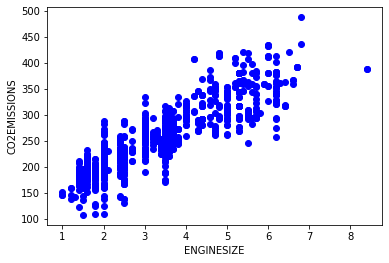

THIS IS THE TRAINING DATA:
      ENGINESIZE  CO2EMISSIONS
0           2.0           196
1           2.4           221
2           1.5           136
3           3.5           255
4           3.5           244
..          ...           ...
848         3.5           251
849         3.5           271
850         2.0           214
851         3.5           244
852         3.5           253

[853 rows x 2 columns]
THIS IS THE TESTING DATA:
       ENGINESIZE  CO2EMISSIONS
853          2.5           202
854          3.5           255
855          2.5           191
856          2.5           198
857          1.8           161
...          ...           ...
1062         3.0           271
1063         3.2           264
1064         3.0           271
1065         3.2           260
1066         3.2           294

[214 rows x 2 columns]
The slope increase for each x-axis increment is:  [[38.79512384]]
The Y intercept at X=0:  [127.16989951] 

What is your engine size in litres?1.1
Estimated Emission

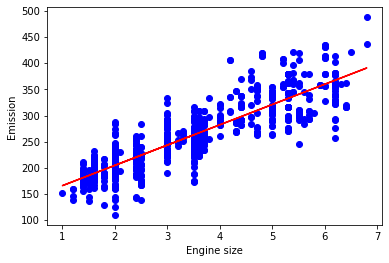

In [104]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


# Read the raw csv file from Github.
data = pd.read_csv('https://raw.githubusercontent.com/jimhannaway/Introductory-Machine-Learning-in-Python/master/FuelConsumptionCo2.csv')
data.head()

# Select two columns to explore, set data to these columns and print the result
data = data[['ENGINESIZE','CO2EMISSIONS']]
data.info()

# Plot the graph ENGINESIZE vs CO2EMISSIONS
plt.scatter(data['ENGINESIZE'] , data['CO2EMISSIONS'] , color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

# Generate training and testing data from the csv file data
# Use 80% data for training
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]
print("THIS IS THE TRAINING DATA:\n", train)
print("THIS IS THE TESTING DATA:\n", test)

# Modeling - Use sklearn package to model the data
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

# The coefficients
print ("The slope increase for each x-axis increment is: ", regr.coef_) #Slope
print ("The Y intercept at X=0: ",regr.intercept_, "\n")              #Intercept

# Now plot the linear regression line using training data
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r') # best fit line  y = intercept + (coeff * x) 
plt.xlabel('Engine size')
plt.ylabel('Emission')

# Functin for predicting emission values 
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

# Predict emission value for a car engine size
my_engine_size = float(input("What is your engine size in litres?"))
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Emission for a", my_engine_size,"litre engine is %.2f" % estimatd_emission)

# Check accuracy on MEA, MSS and R2
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))
